In [12]:

# Clear all variables in workspace
%reset -f 

import sys


sys.path.append("C:\\Users\\s4318841\\OneDrive - The University of Queensland\\2024\\Jupyter projects\\Jupyter_21012024\\Jupyter\\")

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re 
import seaborn as sns
import ampseq as amp
import pathlib as path


In [4]:
# import sys
# sys.path.append("C:\\Users\\s4318841\\OneDrive - The University of Queensland\\2024\\Jupyter projects\\Jupyter_21012024\\Jupyter\\")


# # print(amp.secret)

# amp.addtolist()

# C:\Users\s4318841\OneDrive - The University of Queensland\2024\Jupyter projects\Jupyter_21012024\Jupyter
# simple python file that contains the script only
# other python files will contain the functions. 

In [14]:
import sys 
from pprint import pprint
pprint(sys.path)




['c:\\Users\\s4318841\\OneDrive - The University of Queensland\\2024\\Jupyter '
 'projects\\Jupyter_21012024\\Jupyter',
 'C:\\Program Files '
 '(x86)\\PerkinElmerInformatics\\ChemOffice2019\\ChemScript\\Lib',
 'c:\\ProgramData\\anaconda3\\python310.zip',
 'c:\\ProgramData\\anaconda3\\DLLs',
 'c:\\ProgramData\\anaconda3\\lib',
 'c:\\ProgramData\\anaconda3',
 '',
 'c:\\ProgramData\\anaconda3\\lib\\site-packages',
 'c:\\ProgramData\\anaconda3\\lib\\site-packages\\win32',
 'c:\\ProgramData\\anaconda3\\lib\\site-packages\\win32\\lib',
 'c:\\ProgramData\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\s4318841\\OneDrive - The University of Queensland\\2024\\Jupyter '
 'projects\\Jupyter_21012024\\Jupyter\\',
 'C:\\Users\\s4318841\\OneDrive - The University of Queensland\\2024\\Jupyter '
 'projects\\Jupyter_21012024\\Jupyter\\']


In [15]:
# !cd C:\\Users\\uqawang8\\OneDrive - The University of Queensland\\Documents\\2022\\Jupyter\\
# !cd C:\\Mphil\2022\Experiments\Flow cytometry\ACE results

os.getcwd()

# reload module after changes made
import ampseq as amp
import importlib
importlib.reload(amp)

<module 'ampseq' from 'c:\\Users\\s4318841\\OneDrive - The University of Queensland\\2024\\Jupyter projects\\Jupyter_21012024\\Jupyter\\ampseq.py'>

In [17]:
# Change to project directory which contains the Qiime results 
# !cd C:\Users\s4318841\OneDrive - The University of Queensland\2024\Jupyter projects\Jupyter_21012024\Jupyter\Ace results

# Change pathname as required
# Read Qiime results and save as a dataframe. 
df= pd.read_csv(r'Ace results\level-7.csv')

# # Remove rows with a relative abundance <1%
# df_new= df_new.loc[df_new['Relative Frequency']>0.05]

# # Reorder from descending abundances 
# df_sorted= df_new.sort_values(by='Relative Frequency', ignore_index=True, ascending=False)

# df_sorted


In [18]:

# Totalise the counts into a column ('Total')
df['Total']=df.sum(axis=1)

df



C:\Users\s4318841\AppData\Local\Temp\ipykernel_13816\3837279149.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total']=df.sum(axis=1)


,index,Unassigned;__;__;__;__;__;__,d__Bacteria;p__Abditibacteriota;c__Abditibacteria;o__Abditibacteriales;f__Abditibacteriaceae;g__Abditibacterium;s__uncultured_bacterium,d__Bacteria;p__Acidobacteriota;c__Acidobacteriae;__;__;__;__,d__Bacteria;p__Acidobacteriota;c__Acidobacteriae;o__Acidobacteriae;f__Acidobacteriae;g__Paludibaculum;__,d__Bacteria;p__Acidobacteriota;c__Holophagae;o__Subgroup_7;f__Subgroup_7;g__Subgroup_7;s__uncultured_bacterium,d__Bacteria;p__Acidobacteriota;c__Thermoanaerobaculia;o__Thermoanaerobaculales;f__Thermoanaerobaculaceae;g__Subgroup_10;__,d__Bacteria;p__Acidobacteriota;c__Thermoanaerobaculia;o__Thermoanaerobaculales;f__Thermoanaerobaculaceae;g__Subgroup_10;s__uncultured_bacterium,d__Bacteria;p__Acidobacteriota;c__Vicinamibacteria;o__Subgroup_17;f__Subgroup_17;g__Subgroup_17;__,d__Bacteria;p__Acidobacteriota;c__Vicinamibacteria;o__Vicinamibacterales;f__Vicinamibacteraceae;g__Luteitalea;s__uncultured_bacterium,...,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__Opitutaceae;g__Lacunisphaera;__,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__Opitutaceae;g__Opitutus;s__uncultured_bacterium,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__Pedosphaeraceae;__;__,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__Pedosphaeraceae;g__Oikopleura;s__uncultured_bacterium,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__Pedosphaeraceae;g__uncultured;__,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Prosthecobacter;__,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Prosthecobacter;s__uncultured_bacterium,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__uncultured;s__uncultured_bacterium,d__Bacteria;p__WPS-2;c__WPS-2;o__WPS-2;f__WPS-2;g__WPS-2;s__uncultured_bacterium,Total
0,RA5752_J5607,32014.0,222.0,23.0,0.0,41.0,8.0,17.0,8.0,44.0,...,11.0,5.0,6.0,61.0,16.0,173.0,83.0,9.0,148.0,86891.0
1,RA5753_J5607,1992.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,22252.0
2,RA5754_J5607,803.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5561.0
3,RA5755_J5607,12224.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,32955.0
4,RA5756_J5607,579.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5743.0
5,RA5757_J5607,368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4571.0


In [19]:
len(df.columns)

# (df.iloc[:,2]/df['Total'])

# Convert the counts to relative abundance by dividing by total counts

length_req= len(df.columns)-1
i=1
while i < length_req:
    df.iloc[:,i]=(df.iloc[:,i]/df['Total']*100).round(decimals=2)
    i+=1

print(df)

################ Need to remove the Total column or else it will have issues later

# df.iloc[:,1]/df['Total']
# df.iloc[:,2]/df['Total']


          index  Unassigned;__;__;__;__;__;__  \
0  RA5752_J5607                         36.84   
1  RA5753_J5607                          8.95   
2  RA5754_J5607                         14.44   
3  RA5755_J5607                         37.09   
4  RA5756_J5607                         10.08   
5  RA5757_J5607                          8.05   

   d__Bacteria;p__Abditibacteriota;c__Abditibacteria;o__Abditibacteriales;f__Abditibacteriaceae;g__Abditibacterium;s__uncultured_bacterium  \
0                                               0.26                                                                                         
1                                               0.00                                                                                         
2                                               0.00                                                                                         
3                                               0.00                                    

In [20]:
# print(df)

# column_names= list(df.column.values)

dfwide_columns= df.iloc[:,0];

# dfwide_columns

# print(column_names)
# # print(df)

dfwide=df.set_index('index').transpose()

dfwide.reset_index(inplace=True)

dfwide.rename(columns={'index': 'Taxon'}, inplace=True)

dfwide.head()

# Filter out any taxons which have less than 1% abundance in all samples
is_signif= dfwide.iloc[:,1:6]>=1

falsecheck= dfwide[is_signif].any(axis=1)

dfwide_final=dfwide[falsecheck]

# Reset index
dfwide_final.reset_index(inplace=True)



In [21]:
# Extract the full taxon description 
taxonlist=dfwide_final.Taxon

#create empty list of taxa
taxondict=[]

row=[];

#get the number of rows in the data frame
len(dfwide_final.index)

# Run a for loop to add every sample/row to the dictionary
i=0
while i < len(dfwide_final.index):
    amp.addtolist(taxondict,dfwide_final,i)
    i+=1


len(taxondict)
taxondict[0]='unassigned'

# taxondict.items()
# k, v = taxondict.keys(), taxondict.values()

# convert Series to dataframe
taxondf= pd.DataFrame(taxondict, columns=['Species or Genus'])
taxondf


# # convert dictionary to dataframe
# taxondf= pd.DataFrame(taxondict.items(), columns=['Species or Genus', 'Full taxa'])

# taxondf

# # Export to excel 
# taxadict_df.to_csv('taxfile1.csv')

# # # def addtolist(row):
# # #     taxa_index=df['Feature ID'][row];
# # #     taxa_bd= df['Taxon'][row].split(";");
# # #     taxadict['sample'].append(taxa_index)


# # # # # output the dataframe as a dictionary to allow for excel exporting 
# # # # dict=df.to_dict()

# # # # amp.addlist(df)
    


,Species or Genus
0,unassigned
1,g__Tetrasphaera
2,g__Micropruina
3,g__Chryseobacterium
4,g__uncultured
5,s__uncultured_bacterium
6,g__Kouleothrix
7,s__uncultured_bacterium
8,g__SM1A02
9,g__Brevundimonas


In [569]:
taxondf

# Concat the dataframes to include the abbreviated taxonomy ('Species or Genus')
df_final=pd.concat([dfwide_final, taxondf], axis=1)

# Slice dataframe to only include desired data 
finalrow=len(df_final)-1

df_final=df_final.drop(finalrow)

len(df_final.columns)

df_gg= df_final.iloc[:, 2:9]

df_gg.set_index('Species or Genus', inplace=True)

# df_final=df_final.drop('Total')

# df_final=df_final.set_index('Species or Genus')

# df_gg.rename_axis('Taxons', inplace=True)
# df_gg.rename_axis('Taxons').rename_axis('Samples', axis='columns'inplace=True)

# Final dataframe 
print(df_gg.head)

# Export to excel 
df_gg.to_csv('taxafinalfile.csv')

# We can now open the exported csv file to manually modify the sample name columns



<bound method NDFrame.head of                                     RA5752_J5607  RA5753_J5607  RA5754_J5607  \
Species or Genus                                                               
unassigned                                 36.84          8.95         14.44   
g__Tetrasphaera                            13.47          3.93          0.00   
g__Microbacterium                           0.02          0.28          0.14   
g__Micropruina                              5.23          0.15          0.00   
f__Chitinophagaceae                         0.01          0.64          0.68   
g__Chryseobacterium                         0.02          0.46          1.20   
g__Pedobacter                               0.01          0.87          0.49   
s__uncultured_bacterium                     0.91          0.09          0.00   
g__uncultured                               1.81          0.55          0.00   
s__uncultured_bacterium                     1.65          0.17          0.00   
g__Kouleot

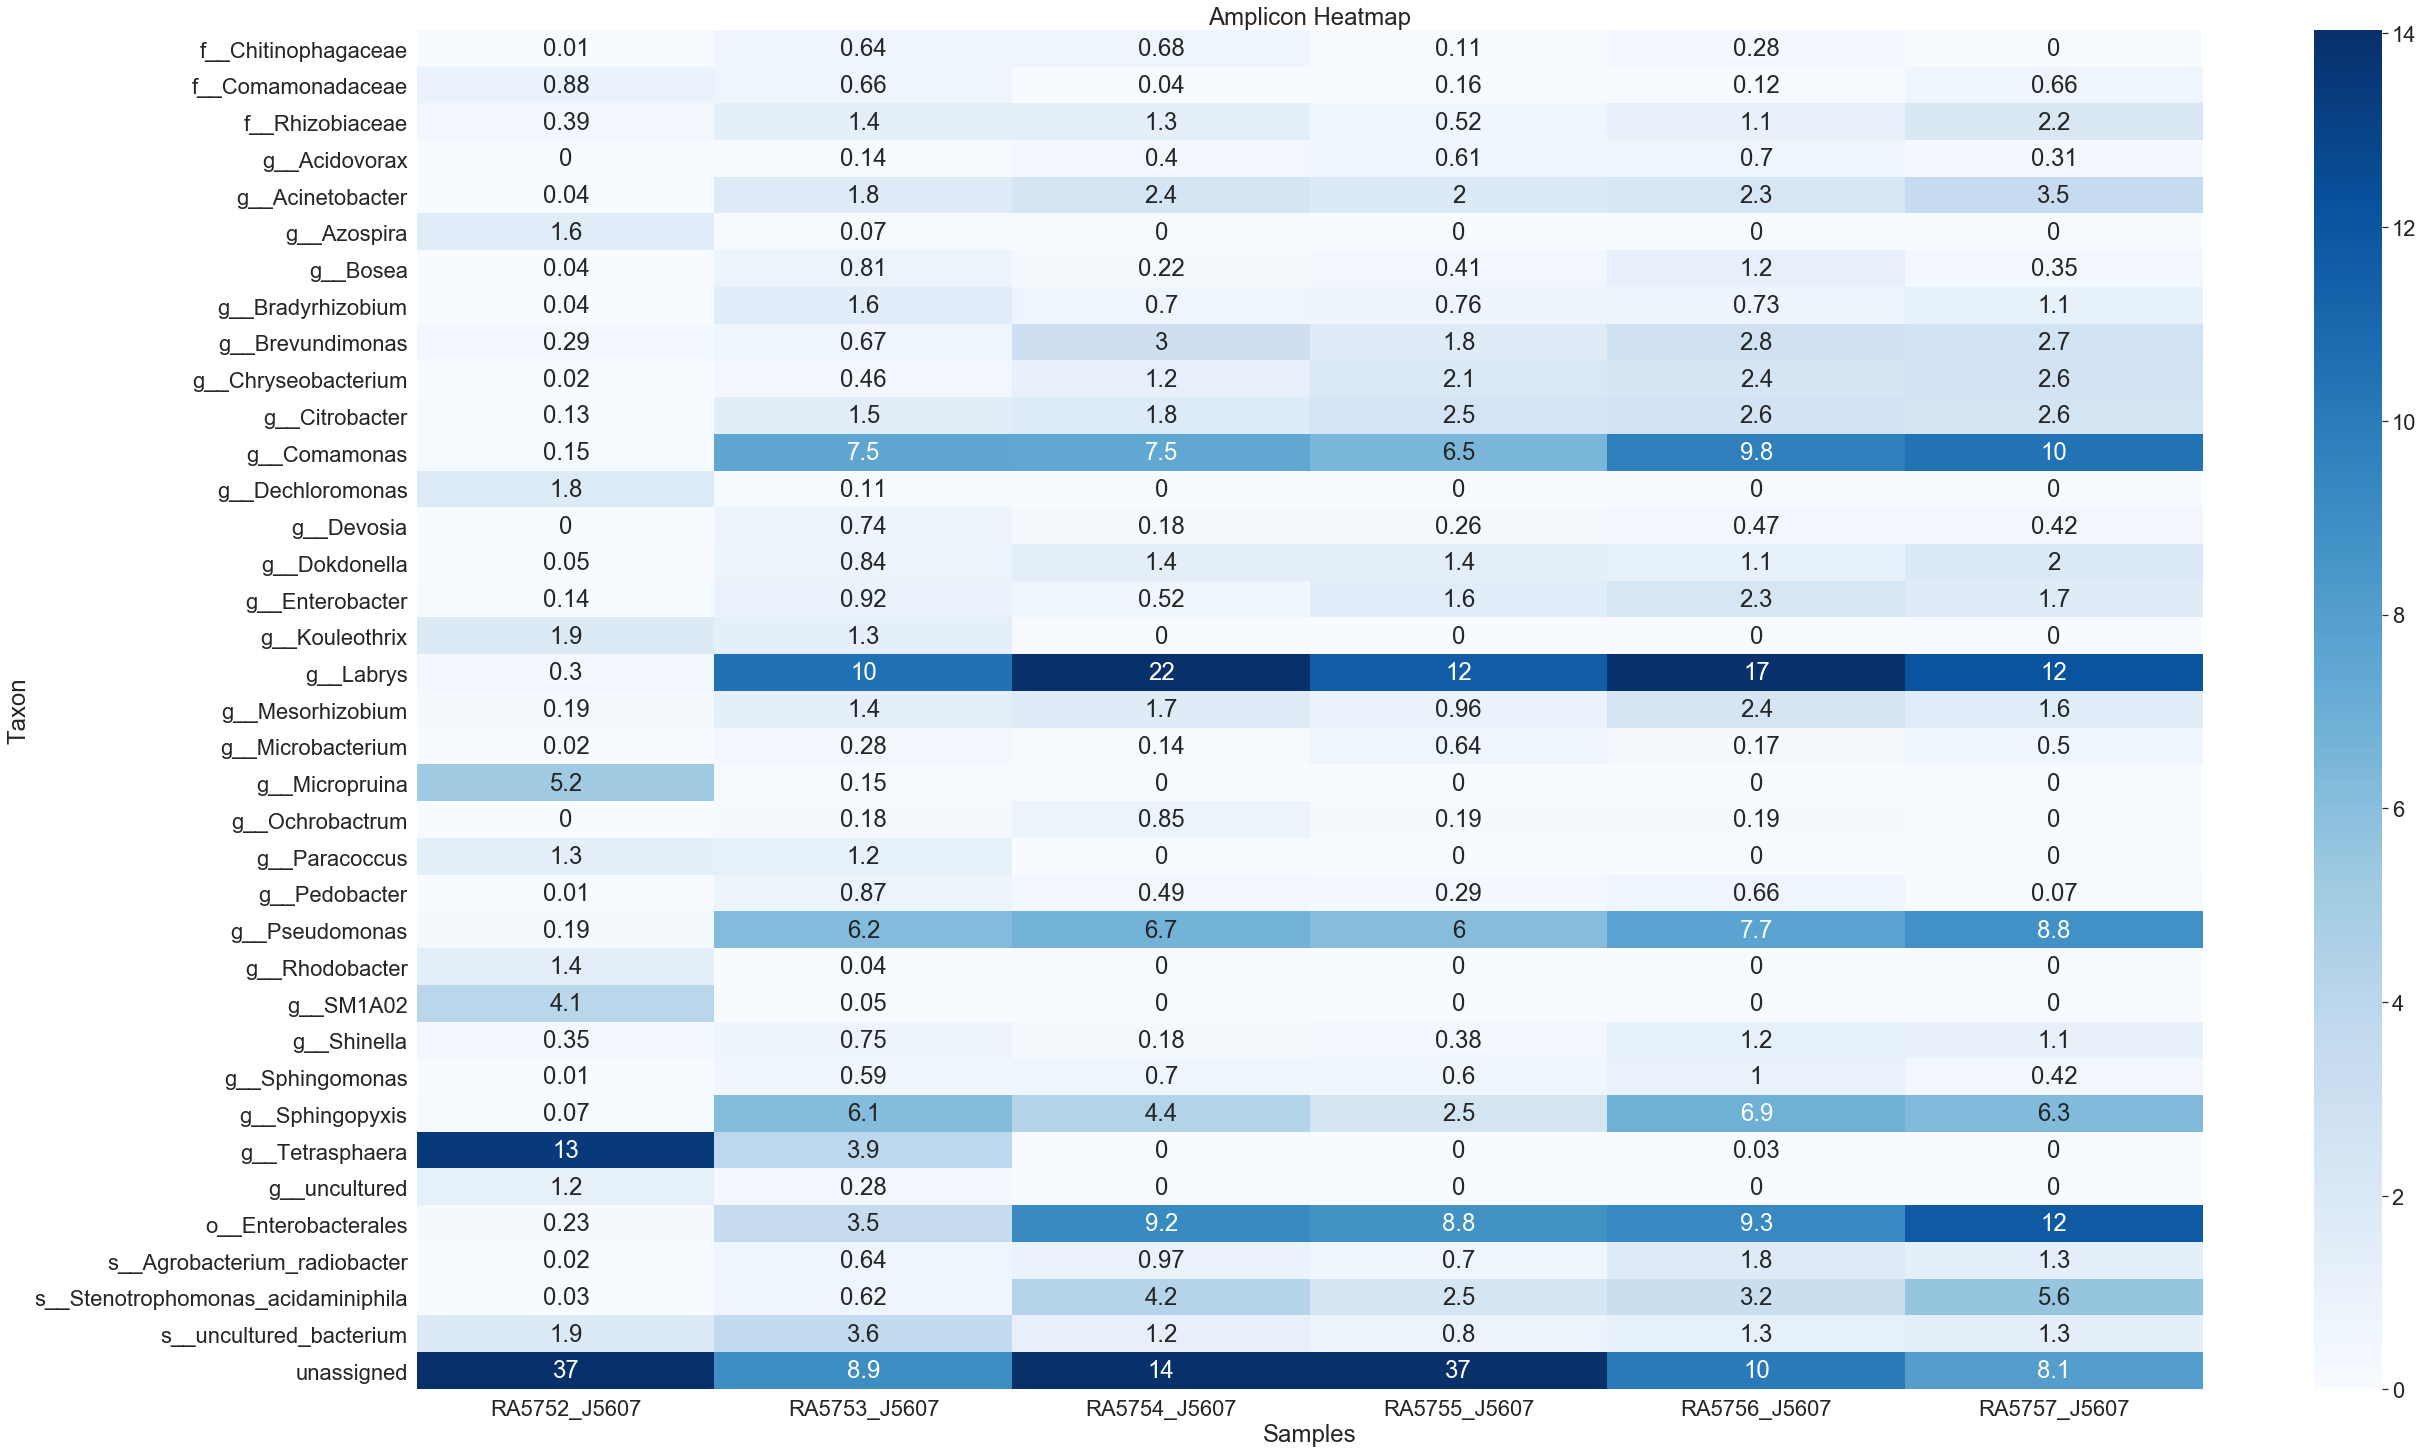

In [571]:
# Read the the excel file back as a dataframe
df_hm= pd.read_csv('taxafinalfile.csv')

# Construct a heatmap using Python's Seaborn library
df_final_hm=df_hm.pivot_table(index='Species or Genus')

plt.figure(figsize=(40,25))

ax=sns.heatmap(df_final_hm, robust= True, cmap='Blues', annot=True)

ax.set(title='Amplicon Heatmap', 
       xlabel="Samples",
       ylabel="Taxon")

figure=ax.get_figure()
figure.savefig('Amplicon_Heatmap.png', dpi=600)
